In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')


In [7]:
# Load Dataset
df = pd.read_csv('Data_Sets/fetal_health.csv')
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
# Dataframe summary

def summary(df):
    print(f'df shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

df shape: (2126, 22)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
baseline value,float64,0,0.0,13,48,2126,106.0,160.000,133.303857,9.840844,120.0,132.000,133.000
accelerations,float64,0,0.0,13,20,2126,0.0,0.019,0.003178,0.003866,0.0,0.006,0.003
fetal_movement,float64,0,0.0,13,102,2126,0.0,0.481,0.009481,0.046666,0.0,0.000,0.000
uterine_contractions,float64,0,0.0,13,16,2126,0.0,0.015,0.004366,0.002946,0.0,0.006,0.008
light_decelerations,float64,0,0.0,13,16,2126,0.0,0.015,0.001889,0.002960,0.0,0.003,0.003
severe_decelerations,float64,0,0.0,13,2,2126,0.0,0.001,0.000003,0.000057,0.0,0.000,0.000
prolongued_decelerations,float64,0,0.0,13,6,2126,0.0,0.005,0.000159,0.000590,0.0,0.000,0.000
abnormal_short_term_variability,float64,0,0.0,13,75,2126,12.0,87.000,46.990122,17.192814,73.0,17.000,16.000
mean_value_of_short_term_variability,float64,0,0.0,13,57,2126,0.2,7.000,1.332785,0.883241,0.5,2.100,2.100
percentage_of_time_with_abnormal_long_term_variability,float64,0,0.0,13,87,2126,0.0,91.000,9.846660,18.396880,43.0,0.000,0.000


In [10]:
df = df.drop_duplicates()

In [12]:
X = df.drop(columns=['fetal_health'])  # Replace with your target column name
y = df['fetal_health']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.966903073286052
[[337   4   0]
 [ 10  44   0]
 [  0   0  28]]
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.92      0.81      0.86        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.96      0.93      0.95       423
weighted avg       0.97      0.97      0.97       423



In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_


In [19]:
import joblib


joblib.dump(scaler, 'model/scaler1.joblib')


['model/scaler1.joblib']

In [20]:
joblib.dump(best_model, 'model/fetal_health_classifier_rain.joblib')

['model/fetal_health_classifier_rain.joblib']

<Axes: xlabel='fetal_health'>

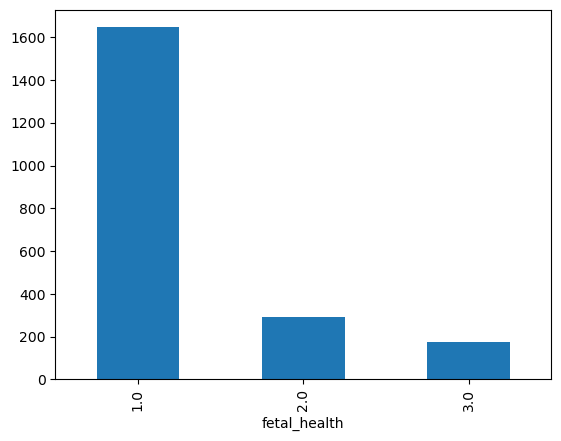

In [21]:
y.value_counts().plot(kind='bar')